In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
import scipy.stats as stats

In [2]:
df = pd.read_excel('Otelrezervasyon.xlsx')

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.4,0,0,Check-Out,2017-09-07


In [88]:
df.info() #veri seti hakkında genel bir bilgi verir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [90]:
df.describe() #Sütunların istatistiksel özetini gösterir. Bu özete NaN değerler dahil edilmez

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,0.245291,0.792798,NaN


In [4]:
df.head() #veri setinin ilk 5 satırını verir

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98,0,1,Check-Out,2015-07-03


In [91]:
df.isnull().sum() #Bir değer yazılı olmayan kaç sütun olduğunu gösterir

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [92]:
df.nunique() # Her bir satırdaki eşsizdeğerleri gösterir

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [93]:
df.sort_values(by="lead_time" , ascending=False).head()
#lead_time sütunundaki değerlerin ilk 5 satırını alır

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
4182,Resort Hotel,0,709,2016,February,9,25,8,20,2,...,No Deposit,NaN,NaN,0,Transient,68,0,0,Check-Out,2016-03-24
65240,City Hotel,1,629,2017,March,13,30,0,2,2,...,Non Refund,1.0,NaN,0,Transient,62,0,0,Canceled,2015-10-21
65249,City Hotel,1,629,2017,March,13,30,0,2,2,...,Non Refund,1.0,NaN,0,Transient,62,0,0,Canceled,2015-10-21
65245,City Hotel,1,629,2017,March,13,30,0,2,2,...,Non Refund,1.0,NaN,0,Transient,62,0,0,Canceled,2015-10-21


In [5]:
df.head(10)
#ilk 10 satırın çıktısı

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [6]:
df.arrival_date_month.head() #sütunun ilk 5 satırın çıktısını verir

0    July
1    July
2    July
3    July
4    July
Name: arrival_date_month, dtype: object

In [7]:
df.tail() # veri setinin son 5 satırını verir

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.4,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.2,0,2,Check-Out,2017-09-07


In [8]:
df.arrival_date_week_number.tail() #istenilen sütunun son 5 satırını verir

119385    35
119386    35
119387    35
119388    35
119389    35
Name: arrival_date_week_number, dtype: int64

In [9]:
A=df[['lead_time', 'arrival_date_week_number']]
A.head()
#A şablonunun ilk 5 satırının çıktısını verir

,lead_time,arrival_date_week_number
0,342,27
1,737,27
2,7,27
3,13,27
4,14,27


In [10]:
A.tail()
#A şablonunun son 5 elemanını verir

,lead_time,arrival_date_week_number
119385,23,35
119386,102,35
119387,34,35
119388,109,35
119389,205,35


In [11]:
df.arrival_date_year [3:8] #sütunun istenilen satırlarını bulmayı sağlar

3    2015
4    2015
5    2015
6    2015
7    2015
Name: arrival_date_year, dtype: int64

In [12]:
df.iloc[2:5,[1,2]] # hem satır hem de sütun seçmeyi sağlar

,is_canceled,lead_time
2,0,7
3,0,13
4,0,14


In [13]:
df.values #veri setini dizi haline getirir

array([['Resort Hotel', 0, 342, ..., 0, 'Check-Out',
        Timestamp('2015-07-01 00:00:00')],
       ['Resort Hotel', 0, 737, ..., 0, 'Check-Out',
        Timestamp('2015-07-01 00:00:00')],
       ['Resort Hotel', 0, 7, ..., 0, 'Check-Out',
        Timestamp('2015-07-02 00:00:00')],
       ...,
       ['City Hotel', 0, 34, ..., 4, 'Check-Out',
        Timestamp('2017-09-07 00:00:00')],
       ['City Hotel', 0, 109, ..., 0, 'Check-Out',
        Timestamp('2017-09-07 00:00:00')],
       ['City Hotel', 0, 205, ..., 2, 'Check-Out',
        Timestamp('2017-09-07 00:00:00')]], dtype=object)

In [14]:
len('arrival_date_week_number')
#karakter sayısının çıktısı

24

In [15]:
df[["lead_time", "arrival_date_month"]].head() #istenilen sütunların ilk 5 satırı yazdırır

,lead_time,arrival_date_month
0,342,July
1,737,July
2,7,July
3,13,July
4,14,July


In [16]:
df.isnull().sum().sum() 
#kaç tane NaN değeri olduğunu gösterir

129425

In [17]:
df.isnull() #eksik olan verilerin dosyada taranmasını sağlar

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [18]:
df.dropna() #eksik verilerin bulunduğu satırı çıkarır

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,...,No Deposit,240.0,113.0,0,Transient,82,1,1,Check-Out,2015-10-13
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,...,No Deposit,185.0,281.0,0,Transient-Party,52.2,0,0,Check-Out,2015-11-17
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,...,No Deposit,334.0,281.0,0,Transient-Party,48,0,0,Check-Out,2015-11-06
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,...,No Deposit,328.0,281.0,0,Transient-Party,40,0,0,Check-Out,2015-11-15
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,...,No Deposit,326.0,281.0,0,Transient-Party,48,0,0,Check-Out,2015-11-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,City Hotel,0,13,2017,May,21,24,0,1,2,...,No Deposit,9.0,478.0,0,Transient-Party,150,0,1,Check-Out,2017-05-25
113046,City Hotel,0,13,2017,May,22,29,1,3,1,...,No Deposit,290.0,148.0,0,Transient,95,0,0,Check-Out,2017-06-02
113082,City Hotel,0,13,2017,May,22,29,1,3,2,...,No Deposit,290.0,148.0,0,Transient,110,0,0,Check-Out,2017-06-02
113627,City Hotel,0,210,2017,June,23,9,0,1,2,...,No Deposit,14.0,229.0,0,Transient,135,0,0,Check-Out,2017-06-10


In [19]:
df.fillna(0) #eksik verilerin yerine girilen değer yazılır 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.4,0,0,Check-Out,2017-09-07


In [20]:
df.fillna({"arrival_date_month":0.5, "is_canceled":0}) #farklı sütunlar için farklı değerlerle eksik veriler doldurulabilir

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.4,0,0,Check-Out,2017-09-07


In [21]:
df.fillna(method='ffill') #ileri doğru doldurur

C:\Users\Bilge\AppData\Local\Temp\ipykernel_2556\1876292990.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill') #ileri doğru doldurur


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,485.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,485.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,485.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,485.0,0,Transient,104.4,0,0,Check-Out,2017-09-07


In [22]:
df.ffill() #ileri doldurma

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,485.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,485.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,485.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,485.0,0,Transient,104.4,0,0,Check-Out,2017-09-07


In [23]:
df.fillna(method='ffill', limit=1)

C:\Users\Bilge\AppData\Local\Temp\ipykernel_2556\3640860781.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', limit=1)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.4,0,0,Check-Out,2017-09-07


In [24]:
df.bfill(limit=1) #geriye doğru doldurur

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.4,0,0,Check-Out,2017-09-07


In [25]:
df.fillna(method='bfill') #geriye doğru doldurur

C:\Users\Bilge\AppData\Local\Temp\ipykernel_2556\466064005.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill') #geriye doğru doldurur


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,304.0,110.0,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,304.0,110.0,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,304.0,110.0,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,110.0,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,110.0,0,Transient,98,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.4,0,0,Check-Out,2017-09-07


In [26]:
df.bfill()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,304.0,110.0,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,304.0,110.0,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,304.0,110.0,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,110.0,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,110.0,0,Transient,98,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.4,0,0,Check-Out,2017-09-07


In [27]:
df.fillna(method='bfill') #geriye doğru doldurur

C:\Users\Bilge\AppData\Local\Temp\ipykernel_2556\466064005.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill') #geriye doğru doldurur


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,304.0,110.0,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,304.0,110.0,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,304.0,110.0,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,110.0,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,110.0,0,Transient,98,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.4,0,0,Check-Out,2017-09-07


In [28]:
df.duplicated() #yineleme olup olmadığı kontrol edilir

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [29]:
df.drop_duplicates() #yinelenen değerlerin kaldırılmasını sağlar

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.4,0,0,Check-Out,2017-09-07


In [30]:
df.replace('No Deposit','Depozitosuz')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Depozitosuz,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Depozitosuz,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Depozitosuz,NaN,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Depozitosuz,304.0,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Depozitosuz,240.0,NaN,0,Transient,98,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Depozitosuz,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Depozitosuz,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Depozitosuz,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Depozitosuz,89.0,NaN,0,Transient,104.4,0,0,Check-Out,2017-09-07


In [31]:
df.rename (columns={'adults':'yetiskinler', 'company':'sirket'})
#sütun isimlerini değiştitir

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,yetiskinler,...,deposit_type,agent,sirket,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.4,0,0,Check-Out,2017-09-07


In [32]:
df.deposit_type.replace('No Deposit','Depozitosuz')

0         Depozitosuz
1         Depozitosuz
2         Depozitosuz
3         Depozitosuz
4         Depozitosuz
             ...     
119385    Depozitosuz
119386    Depozitosuz
119387    Depozitosuz
119388    Depozitosuz
119389    Depozitosuz
Name: deposit_type, Length: 119390, dtype: object

In [33]:
kukla=pd.get_dummies(df['is_canceled'] , prefix='is_canceled')
kukla
#kukla değişkeni ile değişkenlerin ataması yapılarak yeni değerler var olan veri üzernde sütun olarak belirtilir.

,is_canceled_0,is_canceled_1
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
119385,True,False
119386,True,False
119387,True,False
119388,True,False


In [34]:
x=df.lead_time
ortalama=np.mean(x)
ortalama
#lead_time sütunu için ortalama

104.01141636652986

In [35]:
y=df.arrival_date_week_number
hort=scipy.stats.hmean(y)
hort
#arrival_date_week_number sütunu için harmonik ortalamayı verir

14.886480950651057

In [36]:
gort=statistics.geometric_mean(y)
gort
#geometrik ortalama

22.360508626482325

In [37]:
mod=statistics.mode(x)
mod

0

In [38]:
mod=statistics.mode(y)
mod

33

In [39]:
t=df.arrival_date_day_of_month
mod=statistics.mode(t)
mod

17

In [40]:
medyan=statistics.median(t)
medyan

16.0

In [41]:
B=df[['lead_time','arrival_date_week_number']]
B.values
#seçilen sütunlardaki değerleri dizi olarak getirir

array([[342,  27],
       [737,  27],
       [  7,  27],
       ...,
       [ 34,  35],
       [109,  35],
       [205,  35]], dtype=int64)

In [42]:
np.mean(B,axis=None)
#tüm verilerin ortalaması

65.58829466454478

In [43]:
np.mean(B,axis=0)
#sütunların ortalaması

lead_time                   104.011416
arrival_date_week_number     27.165173
dtype: float64

In [44]:
np.mean(B,axis=1)
#satırların ortalaması

0         184.5
1         382.0
2          17.0
3          20.0
4          20.5
          ...  
119385     29.0
119386     68.5
119387     34.5
119388     72.0
119389    120.0
Length: 119390, dtype: float64

In [45]:
np.median(B,axis=0)
#sütunların medyanı

array([69., 28.])

In [46]:
np.median(B,axis=1)
#satırların medyanı

array([184.5, 382. ,  17. , ...,  34.5,  72. , 120. ])

In [47]:
df['arrival_date_week_number'].mean()
#belirli bir satır için ortalama

27.16517296255968

In [48]:
df['arrival_date_week_number'].var()
#belirli bir satır için varyans

185.09978967223384

In [49]:
var=np.var(y,ddof=1)
var
#arrival_date_week_number için varyans

185.09978967223384

In [50]:
stdsapma=np.std(y,ddof=1)
stdsapma
#sütuna özel standart sapma

13.60513835549767

In [51]:
Çarpıklık=y.skew()
Çarpıklık
#Sütuna özel çarpıklık

-0.010014326041540811

In [52]:
Basıklık=scipy.stats.kurtosis(y)
Basıklık
#Sütuna özel basıklık

-0.9860861353853956

In [53]:
z=np.array(x)
np.percentile(z,10)
#10 yüzdelik dilim bulmayı sağlar

3.0

In [54]:
np.ptp(x)
#veri aralığı yani en büyük ve en küçük veri seti arasındak farkı bulmaya yarar

737

In [55]:
scipy.stats.describe(x)
#istatistik hakkında genel bilgi verir

DescribeResult(nobs=119390, minmax=(0, 737), mean=104.01141636652986, variance=11419.721510687685, skewness=1.3465329547937892, kurtosis=1.6963275478254607)

In [56]:
#nobs veri setindeki öğelerin sayısı
#minmax veri setindeki min ve max değerlerini içeren demet
#mean ortalama
#variance varyans
#shewness çarpıklık
#kurtosis basıklık

In [57]:
sonuç=scipy.stats.describe(y)
sonuç

DescribeResult(nobs=119390, minmax=(1, 53), mean=27.16517296255968, variance=185.09978967223384, skewness=-0.010014200222448031, kurtosis=-0.9860861353853956)

In [58]:
sonuç=y.describe()
sonuç

count    119390.000000
mean         27.165173
std          13.605138
min           1.000000
25%          16.000000
50%          28.000000
75%          38.000000
max          53.000000
Name: arrival_date_week_number, dtype: float64

In [59]:
#count: veri kümesindeki öğe sayısı
#mean: veri kümesindeki ortalaması
#std: veri kümesinin standart sapması
#min ve max: veri kümesinin minimum ve maksimum değerleri
#25 %, 50 %, 75 %: veri kümesinin dörtte birlik kısımları

In [60]:
from scipy.stats import norm
1-norm.cdf(90,80,5)

0.02275013194817921

In [61]:
from matplotlib import pyplot

(array([6.1639e+04, 2.4403e+04, 1.6345e+04, 8.6580e+03, 5.2650e+03,
        1.8250e+03, 8.4400e+02, 2.4700e+02, 1.6200e+02, 2.0000e+00]),
 array([  0. ,  73.7, 147.4, 221.1, 294.8, 368.5, 442.2, 515.9, 589.6,
        663.3, 737. ]),
 <BarContainer object of 10 artists>)

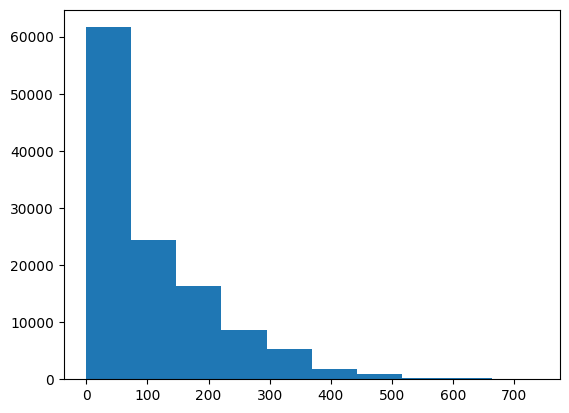

In [62]:
pyplot.hist(x)
#x için histogram grafiği

(array([ 7966., 10661., 11857., 13772., 12719., 17153., 13609., 13094.,
         9824.,  8735.]),
 array([ 1. ,  6.2, 11.4, 16.6, 21.8, 27. , 32.2, 37.4, 42.6, 47.8, 53. ]),
 <BarContainer object of 10 artists>)

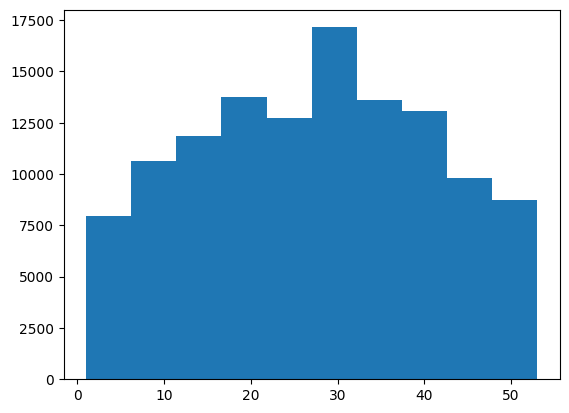

In [63]:
pyplot.hist(y)
# y için histogram grafiği

In [64]:
from statsmodels.graphics.gofplots import qqplot
#qq grafiği

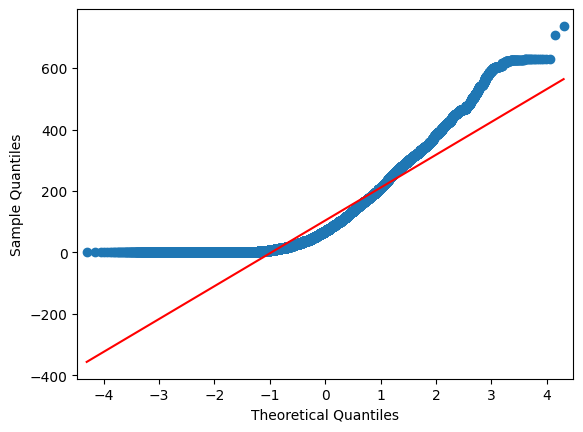

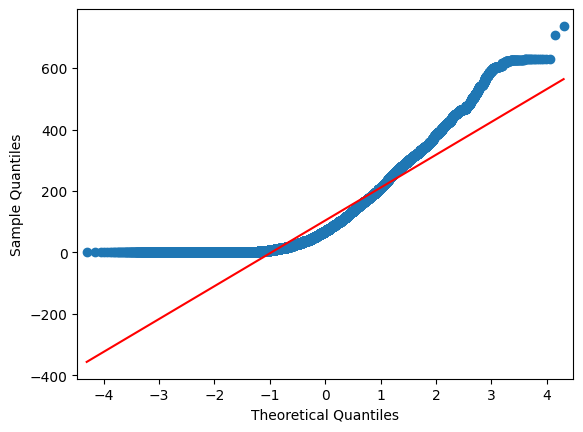

In [65]:
qqplot(x,line='s')

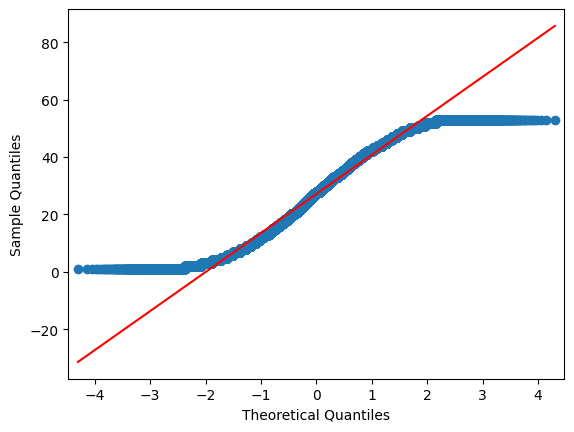

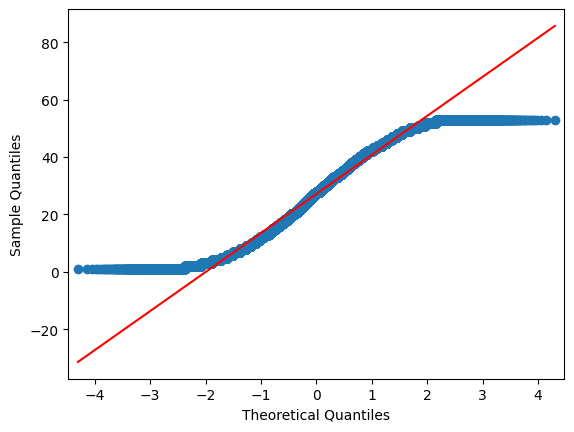

In [66]:
qqplot(y,line='s')

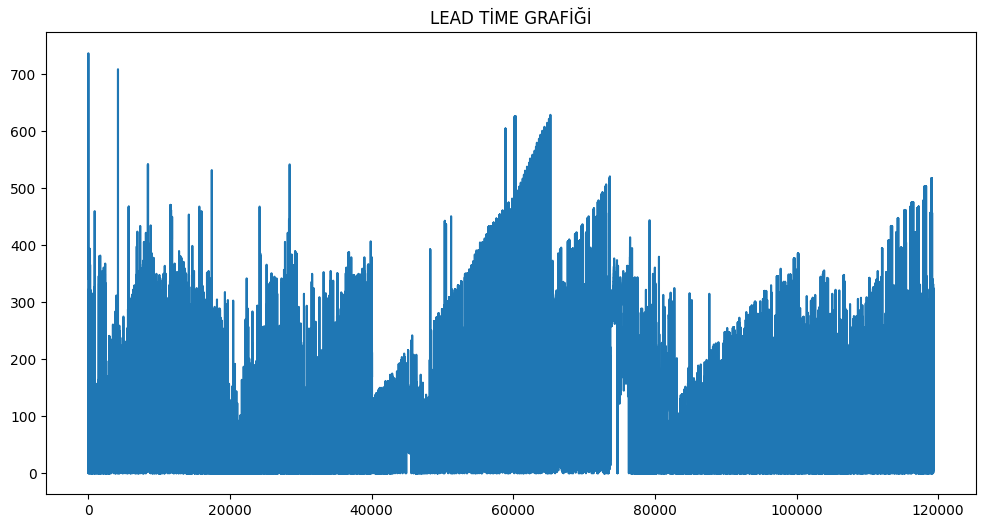

In [94]:
plt.figure(figsize=(12,6))

plt.plot(df.lead_time) 
plt.title("LEAD TİME GRAFİĞİ")

plt.show()

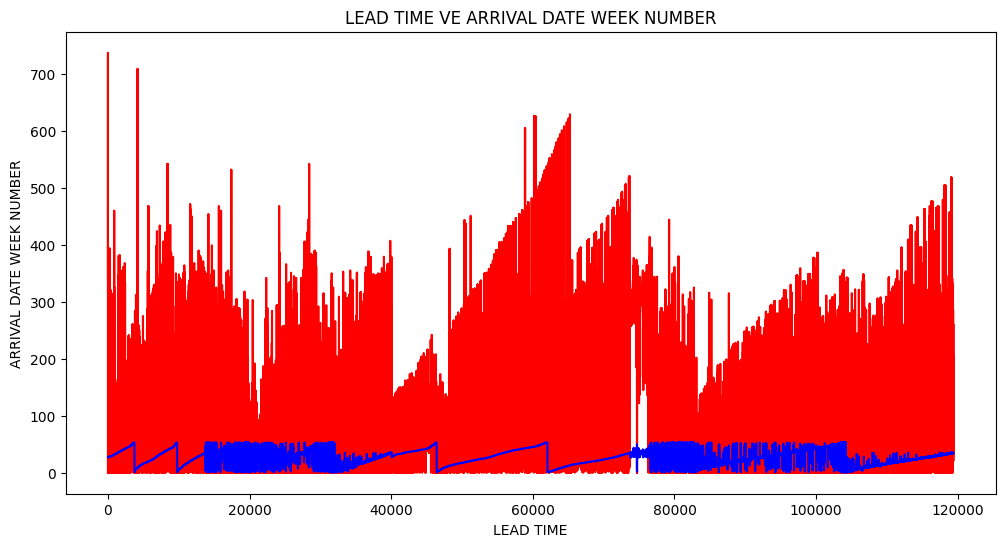

In [97]:
plt.figure(figsize=(12,6))

plt.plot(df.lead_time,color="red") 

plt.plot(df.arrival_date_week_number,color="blue")

plt.xlabel("LEAD TIME")

plt.ylabel("ARRIVAL DATE WEEK NUMBER")

plt.title("LEAD TIME VE ARRIVAL DATE WEEK NUMBER")

plt.show()

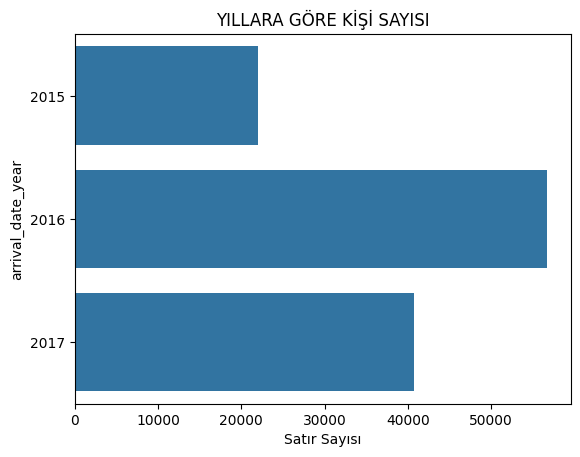

In [98]:
sonuc = df[df['arrival_date_year'].isin(df['arrival_date_year'].value_counts().index[:3])] 

sns.countplot(data=sonuc, y="arrival_date_year")
plt.ylabel("arrival_date_year")
plt.xlabel("Satır Sayısı")
plt.title("YILLARA GÖRE KİŞİ SAYISI")
plt.show()

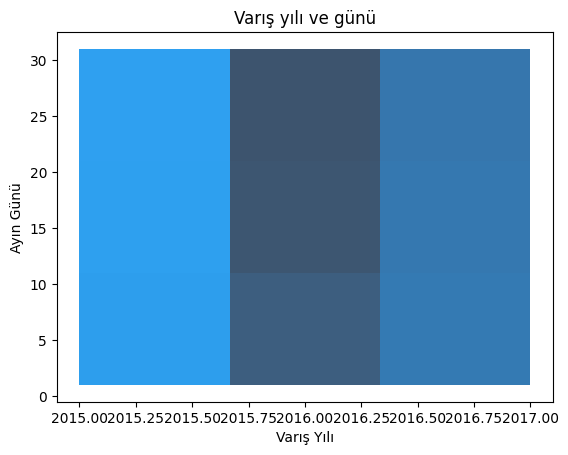

In [101]:
sns.histplot(data=df, x="arrival_date_year", y="arrival_date_day_of_month", bins=3)
plt.xlabel("Varış Yılı") #x ekseninin ismi
plt.ylabel("Ayın Günü") #y ekseninin ismi
plt.title("Varış yılı ve günü") #grafik başlığı
plt.show() #plotu göster

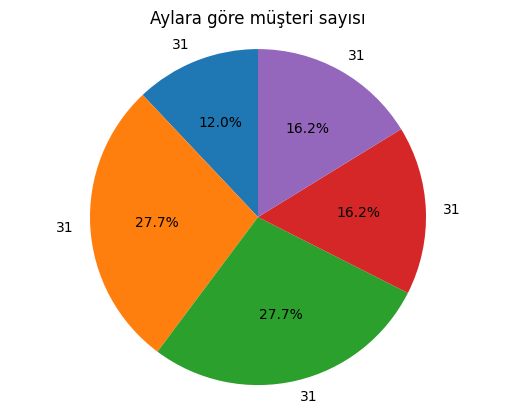

In [102]:
df_day_month_5 = df.sort_values(by='arrival_date_day_of_month', ascending=False).head(5) 

labels = df_day_month_5['arrival_date_day_of_month'].tolist() #pasta dilimlerinin isimlerini belirler
sizes = df_day_month_5['arrival_date_week_number'].tolist() #pasta dilimlerinin boyutlarını belirler

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# autopct: her dilimin tüm pasta alanına oranının yüzdesini gösterir
# startangle: ilk başlayacak açının kaç derece olacağını gösterir
ax.axis('equal') #eksenlerin orantılı olmasını sağlar
ax.set_title('Aylara göre müşteri sayısı')

plt.show()

In [67]:
from scipy.stats import shapiro

In [68]:
shapiro(x)
#shapiro-wilk testi

C:\Users\Bilge\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 119390.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.8567870237471207, pvalue=2.1307491394675912e-126)

In [69]:
from scipy.stats import normaltest

In [70]:
normaltest(x)
#D'Agostino'nun k^2 testi

NormaltestResult(statistic=26123.530872918484, pvalue=0.0)

In [71]:
normaltest(y)
#D'Agostino'nun k^2 testi

NormaltestResult(statistic=25475.861946009725, pvalue=0.0)

In [72]:
import numpy as np
import statsmodels.stats.api as sms
fiyatlar=np.random.randint(10,110,1000)
fiyatlar.mean()

59.11

In [73]:
sms.DescrStatsW(fiyatlar).tconfint_mean()

(57.30273135249295, 60.91726864750705)

In [74]:
from statsmodels.stats.weightstats import ztest

In [75]:
ztest_Score, p_value=ztest(df.arrival_date_day_of_month, value=100,alternative='larger')
ztest_Score, p_value
#tek örneklem için z testi

(-3313.3674155835806, 1.0)

In [76]:
ztest_Score, p_value=ztest(df.arrival_date_day_of_month, value=45,alternative='smaller')
ztest_Score, p_value

(-1149.0989947282367, 0.0)

In [77]:
import math
from numpy.random import randn

ort=44
sh=5/math.sqrt(40)
data=sh*randn(40)+ort
data


array([45.03474414, 44.75514023, 44.2744487 , 43.84332343, 43.39569503,
       44.1388626 , 43.95392726, 44.37225769, 44.14057208, 43.88985945,
       44.11908387, 42.81037606, 43.6711904 , 43.72037198, 45.35630012,
       43.86100575, 44.25629313, 43.62788134, 44.02756674, 43.52578518,
       45.49745897, 44.12997777, 43.48131727, 43.80678444, 43.70807081,
       45.31962333, 45.56312924, 44.63115512, 45.14110804, 43.72494933,
       43.57736187, 42.92663139, 43.73914644, 44.37581294, 43.90192397,
       44.34369985, 44.02866063, 43.87667455, 42.58686361, 43.72768007])

In [78]:
p=stats.norm.cdf(z)
p
#tek anakütle oranının z testi

array([1., 1., 1., ..., 1., 1., 1.])

In [79]:
from statsmodels.stats.proportion import proportions_ztest

In [80]:
count=120 #başarılı deneme sayısı
nobs=200 #gözlem sayısı
value=0.5 #test edilmek istenen oran
ztest_Score, p_value=proportions_ztest(count,nobs,value,alternative="two-sided")
ztest_Score, p_value
#çift yönlü oran testi

(2.886751345948128, 0.0038924171227786367)

In [81]:
count=120 #başarılı deneme sayısı
nobs=200 #gözlem sayısı
value=0.5 #test edilmek istenen oran
ztest_Score, p_value=proportions_ztest(count,nobs,value,alternative="smaller")
ztest_Score, p_value
#tek taraflı oran testi

(2.886751345948128, 0.9980537914386107)

In [82]:
count=120 #başarılı deneme sayısı
nobs=200 #gözlem sayısı
value=0.5 #test edilmek istenen oran
ztest_Score, p_value=proportions_ztest(count,nobs,value,alternative="larger")
ztest_Score, p_value
#tek taraflı oran testi

(2.886751345948128, 0.0019462085613893183)

In [83]:
import scipy.stats as stats
p=1-stats.norm.cdf(z)
p
#iki anakütle ortalamasının z testi

array([0.0000000e+00, 0.0000000e+00, 1.2798651e-12, ..., 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00])

In [84]:
p=2*(1-stats.norm.cdf(z))
p
#iki anakütle oranının z testi

array([0.00000000e+00, 0.00000000e+00, 2.55973021e-12, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [85]:
stats.ttest_ind(x,y)
#t testi örneklerin bağımsız olma hali

TtestResult(statistic=246.48323739845878, pvalue=0.0, df=238778.0)

In [86]:
stats.ttest_1samp(x,290)
#tek örneklem t testi 

TtestResult(statistic=-601.3710353045166, pvalue=0.0, df=119389)

In [87]:
stats.ttest_rel(x,z)
#eşlenik çift örnekler hali

TtestResult(statistic=nan, pvalue=nan, df=119389)